In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
%matplotlib widget
plt.style.use('dark_background')

In [40]:
A = SlabExact(ns=[1.], Ts=[15], xrefs=[1000], symmetric=True)

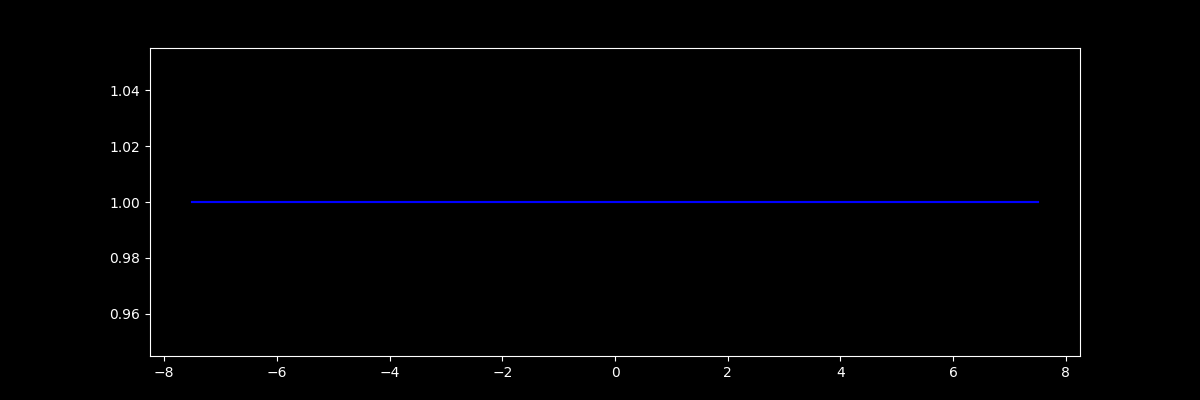

In [41]:
A.plot_refractive_index()

In [42]:
def quadratic_piecewise(x):
    conds = [(x<-1), ((-1<=x)*(x<=1)), (x>1)]
    funcs = [0, lambda x: 1-x**2, 0]
    return np.piecewise(x, conds, funcs)

f0 = lambda x: quadratic_piecewise(x-3) + quadratic_piecewise(x+3)

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

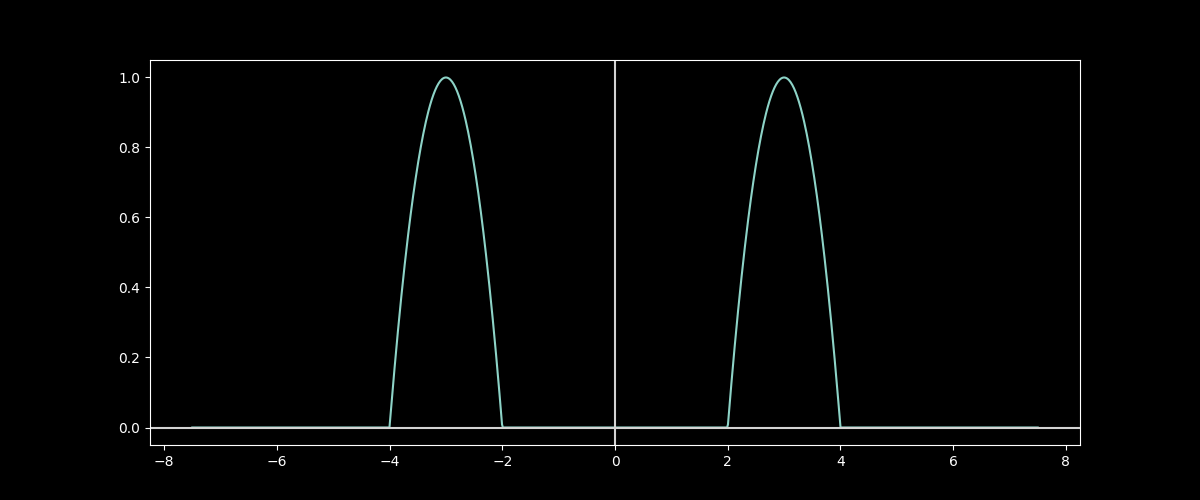

In [43]:
A.plot_field_1d(f0)

In [44]:
# A.plot_field_2d(quadratic_piecewise2d, xs=xs, zmin=-10, zmax=0, zref=100)

In [45]:
Propagator = A.propagator()

## Propagation for 1-x^2

In [66]:
P_prop = Propagator(A.real_contour(0, A.Z_evanescent, 300), f0=f0, Lx=-4, Rx=4)
P_ev = Propagator(A.real_contour(A.Z_evanescent, 45, 400), f0=f0, Lx=-4, Rx=4)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

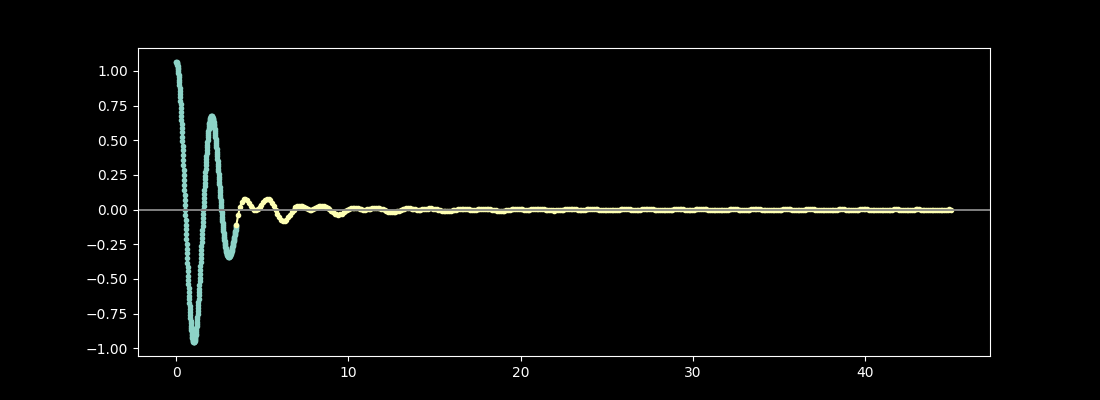

In [67]:
P_prop.plot_transform()
P_ev.plot_transform(ax=plt.gca())

In [68]:
prop = lambda x: P_prop.slice_propagate(x)
ev = lambda x: P_ev.slice_propagate(x)
full = lambda x: prop(x) + ev(x)

Prop = lambda x, z: P_prop.propagate(x, z)
Ev = lambda x, z: P_ev.propagate(x, z)
Full = lambda x, z : Prop(x,z) + Ev(x,z)

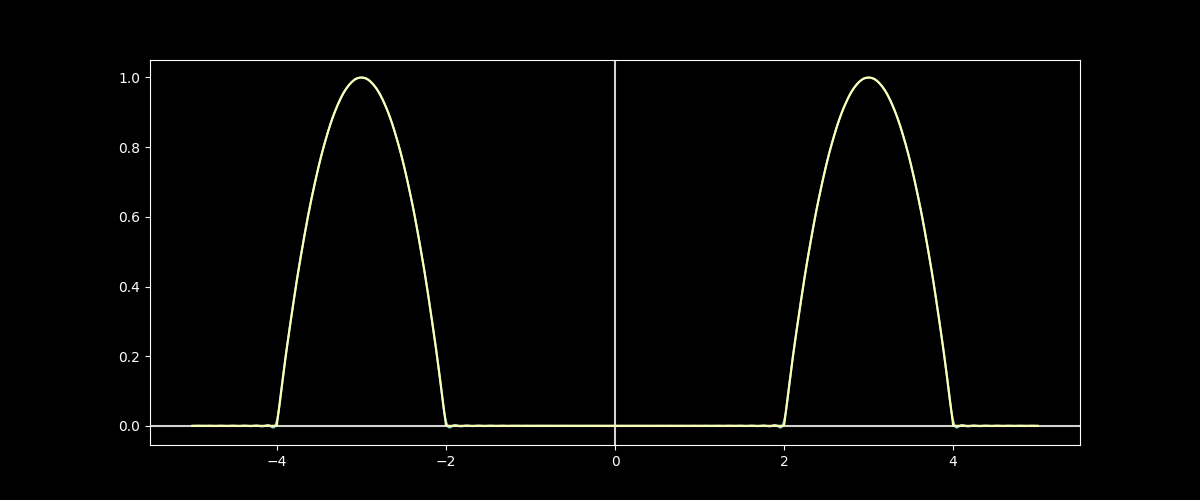

In [69]:
plt.close('all')
A.plot_field_1d(full, xs=xs)
A.add_1d_plot(f0, xs=xs)
# A.add_1d_plot(ev, xs=xs)

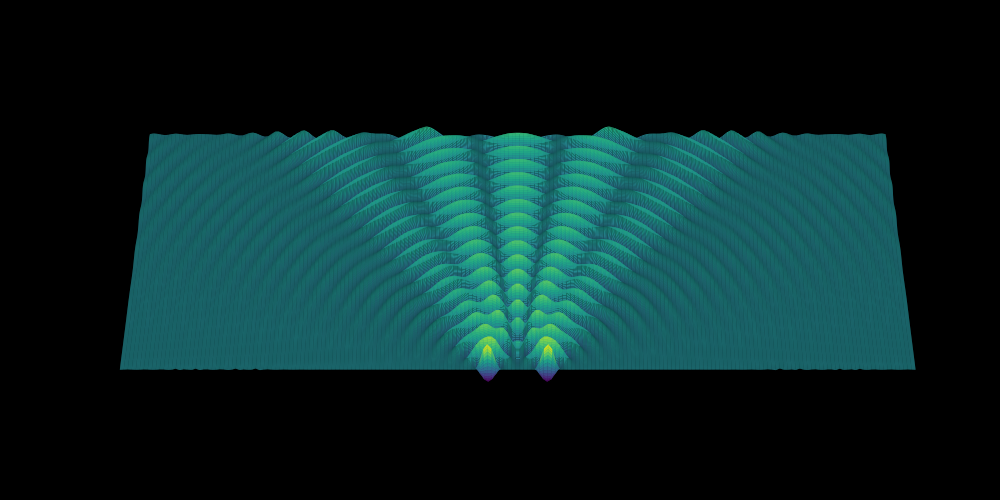

In [70]:
A.plot_field_2d_surface(Full, xs=np.linspace(-40, 40, 200), zmax=30, zref=500, cstride=1, rstride=1);